In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

random_state = 42
from train_test_split import *

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import time



In [2]:
def load_data(path):

    return pd.read_csv(path,index_col='row_id')

dataset_train = load_data('./train/train.csv').copy()
dataset_validation = load_data('./validation/validation.csv').copy()
dataset_test = load_data('./test/test.csv').copy()

In [3]:
dataset_train

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
150473,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.001914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
178923,-9.536743e-07,-0.000010,-0.000043,-0.000114,0.000800,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
118088,-9.536743e-07,-0.000002,-0.000011,-0.000043,-0.000040,-0.000077,-0.000065,-0.000031,-0.000010,-0.000008,...,0.000216,0.000189,0.000191,0.000330,0.000176,0.000034,0.000047,0.000049,1.046326e-06,Bacteroides_fragilis
19773,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,0.000957,0.002914,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Staphylococcus_aureus
45679,4.632568e-08,0.000001,-0.000002,-0.000022,-0.000007,-0.000030,-0.000023,-0.000008,-0.000004,-0.000008,...,0.000113,0.000098,0.000096,0.000184,0.000077,0.000018,0.000024,0.000019,4.632568e-08,Bacteroides_fragilis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144676,4.632568e-08,0.000003,0.000001,-0.000011,0.000014,0.000004,-0.000002,0.000005,0.000004,-0.000007,...,0.000031,0.000036,0.000029,0.000061,0.000025,0.000010,0.000009,0.000006,4.632568e-08,Bacteroides_fragilis
190082,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,0.000914,-0.000043,0.001914,0.001914,0.001957,-0.000010,0.001990,-0.000010,-9.536743e-07,Campylobacter_jejuni
100677,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,0.000914,-0.000043,0.000914,-0.000086,0.001957,-0.000010,0.000990,-0.000010,-9.536743e-07,Campylobacter_jejuni


In [4]:
dataset_validation

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
5823,-9.536743e-07,4.632568e-07,-0.000043,-0.000114,-0.000200,-0.000240,-0.000190,-0.000114,-0.000043,-9.536743e-06,...,0.000664,0.000457,0.000724,0.001014,0.000457,0.000140,0.000160,0.000150,-9.536743e-07,Streptococcus_pyogenes
62039,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,0.000957,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pneumoniae
169659,-9.536743e-07,-1.536743e-06,-0.000014,-0.000054,-0.000066,-0.000103,-0.000082,-0.000048,-0.000013,-7.536743e-06,...,0.000338,0.000219,0.000341,0.000386,0.000232,0.000056,0.000081,0.000061,1.046326e-06,Streptococcus_pyogenes
50021,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,0.001914,-0.000043,-0.000086,0.000914,0.001957,0.000990,-0.000010,0.000990,-9.536743e-07,Campylobacter_jejuni
15794,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40962,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
142951,-9.536743e-07,1.046326e-05,-0.000023,-0.000034,-0.000090,-0.000040,-0.000120,-0.000054,-0.000043,4.632568e-07,...,0.000274,0.000127,0.000444,0.000444,0.000427,0.000020,0.000060,0.000090,-9.536743e-07,Staphylococcus_aureus
57195,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica


In [5]:
dataset_test

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
159061,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000086,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Staphylococcus_aureus
12763,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Escherichia_coli
58080,-9.536743e-07,4.632568e-07,-0.000023,-0.000064,-0.000140,-0.000110,-0.000150,-0.000074,-2.291534e-05,-0.000010,...,0.000614,0.000337,0.000454,0.000624,0.000327,0.000080,0.000060,0.00010,9.046326e-06,Streptococcus_pyogenes
193347,-9.536743e-07,-9.536743e-06,-0.000023,-0.000084,-0.000160,-0.000220,-0.000170,-0.000074,-2.291534e-05,-0.000010,...,0.000504,0.000447,0.000444,0.000774,0.000277,0.000050,0.000080,0.00013,9.046326e-06,Bacteroides_fragilis
46612,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000086,-0.000043,0.000914,-0.000086,-0.000043,0.000990,-0.000010,-0.00001,-9.536743e-07,Streptococcus_pneumoniae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,0.000800,-0.000240,0.002800,-0.000114,9.570847e-04,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Salmonella_enterica
134559,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,0.000990,-0.00001,-9.536743e-07,Streptococcus_pneumoniae
65598,-9.536743e-07,1.046326e-05,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000104,-4.291534e-05,-0.000010,...,0.001454,0.000817,0.001884,0.002644,0.001697,0.000230,0.000550,0.00043,-9.536743e-07,Campylobacter_jejuni


In [6]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(dtype=int)

In [7]:
dataset_train["target_code"] = ord_enc.fit_transform(dataset_train[["target"]])
dataset_train[["target", "target_code"]]

,target,target_code
row_id,,
150473,Streptococcus_pyogenes,9
178923,Salmonella_enterica,6
118088,Bacteroides_fragilis,0
19773,Staphylococcus_aureus,7
45679,Bacteroides_fragilis,0
...,...,...
144676,Bacteroides_fragilis,0
190082,Campylobacter_jejuni,1
100677,Campylobacter_jejuni,1


In [8]:
dataset_train

,target,target_code
row_id,,
150473,Streptococcus_pyogenes,9
178923,Salmonella_enterica,6
118088,Bacteroides_fragilis,0
19773,Staphylococcus_aureus,7
45679,Bacteroides_fragilis,0
...,...,...
144676,Bacteroides_fragilis,0
190082,Campylobacter_jejuni,1
100677,Campylobacter_jejuni,1


In [9]:
dataset_validation["target_code"] = ord_enc.fit_transform(dataset_validation[["target"]])
dataset_validation[["target", "target_code"]]

,target,target_code
row_id,,
5823,Streptococcus_pyogenes,9
62039,Streptococcus_pneumoniae,8
169659,Streptococcus_pyogenes,9
50021,Campylobacter_jejuni,1
15794,Streptococcus_pyogenes,9
...,...,...
40962,Streptococcus_pyogenes,9
142951,Staphylococcus_aureus,7
57195,Salmonella_enterica,6


In [10]:
dataset_validation

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
5823,-9.536743e-07,4.632568e-07,-0.000043,-0.000114,-0.000200,-0.000240,-0.000190,-0.000114,-0.000043,-9.536743e-06,...,0.000457,0.000724,0.001014,0.000457,0.000140,0.000160,0.000150,-9.536743e-07,Streptococcus_pyogenes,9
62039,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,0.000957,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pneumoniae,8
169659,-9.536743e-07,-1.536743e-06,-0.000014,-0.000054,-0.000066,-0.000103,-0.000082,-0.000048,-0.000013,-7.536743e-06,...,0.000219,0.000341,0.000386,0.000232,0.000056,0.000081,0.000061,1.046326e-06,Streptococcus_pyogenes,9
50021,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,0.000914,0.001957,0.000990,-0.000010,0.000990,-9.536743e-07,Campylobacter_jejuni,1
15794,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40962,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
142951,-9.536743e-07,1.046326e-05,-0.000023,-0.000034,-0.000090,-0.000040,-0.000120,-0.000054,-0.000043,4.632568e-07,...,0.000127,0.000444,0.000444,0.000427,0.000020,0.000060,0.000090,-9.536743e-07,Staphylococcus_aureus,7
57195,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6


In [11]:
dataset_test["target_code"] = ord_enc.fit_transform(dataset_test[["target"]])
dataset_test[["target", "target_code"]]

,target,target_code
row_id,,
159061,Staphylococcus_aureus,7
12763,Escherichia_coli,3
58080,Streptococcus_pyogenes,9
193347,Bacteroides_fragilis,0
46612,Streptococcus_pneumoniae,8
...,...,...
10315,Salmonella_enterica,6
134559,Streptococcus_pneumoniae,8
65598,Campylobacter_jejuni,1


In [12]:
dataset_test

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
159061,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Staphylococcus_aureus,7
12763,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Escherichia_coli,3
58080,-9.536743e-07,4.632568e-07,-0.000023,-0.000064,-0.000140,-0.000110,-0.000150,-0.000074,-2.291534e-05,-0.000010,...,0.000337,0.000454,0.000624,0.000327,0.000080,0.000060,0.00010,9.046326e-06,Streptococcus_pyogenes,9
193347,-9.536743e-07,-9.536743e-06,-0.000023,-0.000084,-0.000160,-0.000220,-0.000170,-0.000074,-2.291534e-05,-0.000010,...,0.000447,0.000444,0.000774,0.000277,0.000050,0.000080,0.00013,9.046326e-06,Bacteroides_fragilis,0
46612,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000043,0.000914,-0.000086,-0.000043,0.000990,-0.000010,-0.00001,-9.536743e-07,Streptococcus_pneumoniae,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,0.000800,-0.000240,0.002800,-0.000114,9.570847e-04,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Salmonella_enterica,6
134559,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,0.000990,-0.00001,-9.536743e-07,Streptococcus_pneumoniae,8
65598,-9.536743e-07,1.046326e-05,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000104,-4.291534e-05,-0.000010,...,0.000817,0.001884,0.002644,0.001697,0.000230,0.000550,0.00043,-9.536743e-07,Campylobacter_jejuni,1


In [13]:
# dataset_original.dtypes

In [14]:
# dataset_original.keys()

In [15]:
# dataset_original.target

In [16]:
# dataset_original['target'].value_counts()

In [17]:
# dataset_original['target'] = dataset_original['target'].astype('category')
# dataset_original.dtypes

In [18]:
# dataset_original['target'] = dataset_original['target'].cat.codes
# dataset_original

In [19]:
def select_target(df):
    return df['target_code']

In [20]:
def select_features(df):
    drop_target = df.drop('target',axis=1)
    drop_both = drop_target.drop('target_code',axis=1)
    return drop_both

In [21]:
X_dataset_train = select_features(dataset_train)
y_dataset_train = select_target(dataset_train)

In [22]:
X_dataset_validation = select_features(dataset_validation)
y_dataset_validation = select_target(dataset_validation)

In [23]:
X_dataset_test = select_features(dataset_test)
y_dataset_test = select_target(dataset_test)

In [24]:
model = ExtraTreesClassifier()
model.fit(X_dataset_train,y_dataset_train)

ExtraTreesClassifier()

### PLOT LARGEST SCORE VALUE TO SELECT VARIABLES

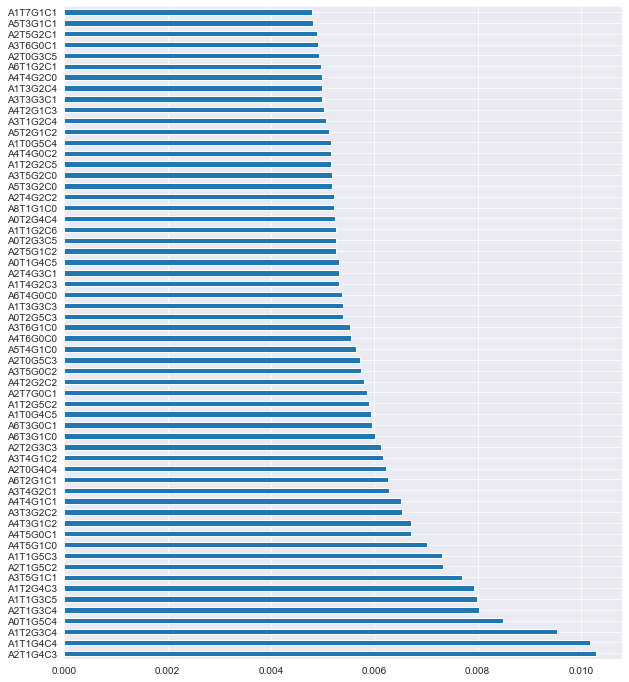

60 : Index(['A2T1G4C3', 'A1T1G4C4', 'A1T2G3C4', 'A0T1G5C4', 'A2T1G3C4', 'A1T1G3C5',
       'A1T2G4C3', 'A3T5G1C1', 'A2T1G5C2', 'A1T1G5C3', 'A4T5G1C0', 'A4T5G0C1',
       'A4T3G1C2', 'A3T3G2C2', 'A4T4G1C1', 'A3T4G2C1', 'A6T2G1C1', 'A2T0G4C4',
       'A3T4G1C2', 'A2T2G3C3', 'A6T3G1C0', 'A6T3G0C1', 'A1T0G4C5', 'A1T2G5C2',
       'A2T7G0C1', 'A4T2G2C2', 'A3T5G0C2', 'A2T0G5C3', 'A5T4G1C0', 'A4T6G0C0',
       'A3T6G1C0', 'A0T2G5C3', 'A1T3G3C3', 'A6T4G0C0', 'A1T4G2C3', 'A2T4G3C1',
       'A0T1G4C5', 'A2T5G1C2', 'A0T2G3C5', 'A1T1G2C6', 'A0T2G4C4', 'A8T1G1C0',
       'A2T4G2C2', 'A5T3G2C0', 'A3T5G2C0', 'A1T2G2C5', 'A4T4G0C2', 'A1T0G5C4',
       'A5T2G1C2', 'A3T1G2C4', 'A4T2G1C3', 'A3T3G3C1', 'A1T3G2C4', 'A4T4G2C0',
       'A6T1G2C1', 'A2T0G3C5', 'A3T6G0C1', 'A2T5G2C1', 'A5T3G1C1', 'A1T7G1C1'],
      dtype='object')


In [25]:
'''
for i in range(20,101,10):
    plt.figure(figsize=(10,8))
    feat_importances = pd.Series(model.feature_importances_,index=X_train.columns)
    feat_importances.nlargest(i).plot(kind='bar')

    plt.show()
    print(i,":", feat_importances.nlargest(i).index)
'''
i = 60

plt.figure(figsize=(10,12))
feat_importances = pd.Series(model.feature_importances_,index=X_dataset_train.columns)
feat_importances.nlargest(i).plot(kind='barh')

plt.show()
print(i,":", feat_importances.nlargest(i).index)

In [26]:
### Univariate Selection ####
'''
from sklearn.feature_selection import SelectKBest,chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','score']
featureScores
'''
### Cannot accept negative values

"\nfrom sklearn.feature_selection import SelectKBest,chi2\n\nbestfeatures = SelectKBest(score_func=chi2, k=10)\nfit = bestfeatures.fit(X_train,y_train)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_train.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['feature','score']\nfeatureScores\n"

### PLOT BOX PLOT

In [27]:
# boxplot_data = X_train.copy()

selected_features = ['A1T2G4C3', 'A1T1G4C4', 'A1T2G3C4', 'A2T1G4C3', 'A3T5G1C1', 'A1T0G5C4',
       'A1T1G5C3', 'A4T4G2C0', 'A2T1G3C4', 'A1T2G2C5', 'A1T1G3C5', 'A4T5G0C1',
       'A3T4G1C2', 'A2T0G4C4', 'A4T5G1C0', 'A4T6G0C0', 'A2T2G3C3', 'A0T1G5C4',
       'A2T0G5C3', 'A6T3G0C1', 'A1T0G4C5', 'A5T2G1C2', 'A0T2G3C5', 'A2T1G5C2',
       'A0T1G4C5', 'A3T5G2C0', 'A4T3G1C2', 'A6T2G1C1', 'A6T1G2C1', 'A1T2G5C2',
       'A1T3G3C3', 'A3T6G1C0', 'A4T4G0C2', 'A3T4G2C1', 'A4T2G1C3', 'A3T6G0C1',
       'A1T0G3C6', 'A7T1G1C1', 'A0T2G4C4', 'A3T3G2C2', 'A5T4G1C0', 'A4T2G2C2',
       'A0T0G5C5', 'A3T1G2C4', 'A7T2G1C0', 'A3T5G0C2', 'A2T7G0C1', 'A1T1G2C6',
       'A5T1G1C3', 'A2T4G2C2', 'A6T2G2C0', 'A4T4G1C1', 'A0T1G6C3', 'A0T2G5C3',
       'A6T4G0C0', 'A0T1G3C6', 'A1T6G1C2', 'A4T3G2C1', 'A1T4G2C3', 'A2T2G2C4']

# boxplot_data[selected_features] = np.log(boxplot_data[selected_features])
# boxplot_data.boxplot(column=selected_features)
# plt.ylabel(selected_features)
# plt.title(selected_features)
# plt.show()
'''
for feature in selected_features:
       # boxplot_data[feature]=np.log(boxplot_data[feature])
       original_train_data.boxplot(column=feature)
       plt.ylabel(feature)
       plt.title(feature)
       plt.show()
'''

'\nfor feature in selected_features:\n       # boxplot_data[feature]=np.log(boxplot_data[feature])\n       original_train_data.boxplot(column=feature)\n       plt.ylabel(feature)\n       plt.title(feature)\n       plt.show()\n'

### REMOVING OUTLIERS FROM THE BOXPLOT

In [28]:
# boxplot_data = X_train.copy()

# selected_features = ['A1T2G4C3', 'A1T1G4C4', 'A1T2G3C4', 'A2T1G4C3', 'A3T5G1C1', 'A1T0G5C4',
#        'A1T1G5C3', 'A4T4G2C0', 'A2T1G3C4', 'A1T2G2C5', 'A1T1G3C5', 'A4T5G0C1',
#        'A3T4G1C2', 'A2T0G4C4', 'A4T5G1C0', 'A4T6G0C0', 'A2T2G3C3', 'A0T1G5C4',
#        'A2T0G5C3', 'A6T3G0C1', 'A1T0G4C5', 'A5T2G1C2', 'A0T2G3C5', 'A2T1G5C2',
#        'A0T1G4C5', 'A3T5G2C0', 'A4T3G1C2', 'A6T2G1C1', 'A6T1G2C1', 'A1T2G5C2',
#        'A1T3G3C3', 'A3T6G1C0', 'A4T4G0C2', 'A3T4G2C1', 'A4T2G1C3', 'A3T6G0C1',
#        'A1T0G3C6', 'A7T1G1C1', 'A0T2G4C4', 'A3T3G2C2', 'A5T4G1C0', 'A4T2G2C2',
#        'A0T0G5C5', 'A3T1G2C4', 'A7T2G1C0', 'A3T5G0C2', 'A2T7G0C1', 'A1T1G2C6',
#        'A5T1G1C3', 'A2T4G2C2', 'A6T2G2C0', 'A4T4G1C1', 'A0T1G6C3', 'A0T2G5C3',
#        'A6T4G0C0', 'A0T1G3C6', 'A1T6G1C2', 'A4T3G2C1', 'A1T4G2C3', 'A2T2G2C4']

features_tbs = feat_importances.nlargest(i).index

# # boxplot_data[selected_features] = np.log(boxplot_data[selected_features])
# # boxplot_data.boxplot(column=selected_features)
# # plt.ylabel(selected_features)
# # plt.title(selected_features)
# # plt.show()
'''
for feature in features_tbs:
    
    q1 = dataset_train[feature].quantile(0.25)
    q3 = dataset_train[feature].quantile(0.75)
    IQR = q3-q1
    lower_extreme = q1 - 1.5*IQR
    upper_extreme = q3 + 1.5*IQR

    out1 = dataset_train[(dataset_train[feature]<lower_extreme)].index
    out2 = dataset_train[(dataset_train[feature]>upper_extreme)].index

    dataset_train.drop(out1,inplace=True)
    dataset_train.drop(out2,inplace=True)
'''

    # dataset_train[feature].replace(out1,mean,inplace=True)
    # dataset_train[feature].replace(out2,mean,inplace=True)
    
    #boxplot_data[feature]=np.log(boxplot_data[feature])

# '''
#     original_train_data.boxplot(column=feature)
#     plt.ylabel(feature)
#     plt.title(feature)
#     plt.show()
# '''

'\nfor feature in features_tbs:\n    \n    q1 = dataset_train[feature].quantile(0.25)\n    q3 = dataset_train[feature].quantile(0.75)\n    IQR = q3-q1\n    lower_extreme = q1 - 1.5*IQR\n    upper_extreme = q3 + 1.5*IQR\n\n    out1 = dataset_train[(dataset_train[feature]<lower_extreme)].index\n    out2 = dataset_train[(dataset_train[feature]>upper_extreme)].index\n\n    dataset_train.drop(out1,inplace=True)\n    dataset_train.drop(out2,inplace=True)\n'

In [29]:
def modified_dataset(dataset):
    selected_columns = feat_importances.nlargest(i).index
    df = pd.DataFrame(dataset,columns=selected_columns)
    df['target'] = dataset['target']
    df['target_code'] = dataset['target_code']
    return df
    
df_train = modified_dataset(dataset_train)
df_train

,A2T1G4C3,A1T1G4C4,A1T2G3C4,A0T1G5C4,A2T1G3C4,A1T1G3C5,A1T2G4C3,A3T5G1C1,A2T1G5C2,A1T1G5C3,...,A1T3G2C4,A4T4G2C0,A6T1G2C1,A2T0G3C5,A3T6G0C1,A2T5G2C1,A5T3G1C1,A1T7G1C1,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
150473,-0.005016,-0.006008,-0.011016,0.000798,-0.009016,-0.001807,-0.005016,0.003193,-0.004210,-0.003807,...,-0.006016,0.001996,0.009597,-0.001403,0.000199,0.004790,0.002193,0.002313,Streptococcus_pyogenes,9
178923,0.006984,-0.002008,-0.005016,0.001798,-0.003016,0.001193,-0.002016,0.004193,0.000790,0.000193,...,-0.002016,-0.003004,-0.000403,0.000597,-0.000801,0.000790,-0.003807,0.001313,Salmonella_enterica,6
118088,-0.002618,-0.001574,-0.002395,-0.000375,-0.002474,-0.001255,-0.002214,0.001876,-0.001457,-0.001311,...,-0.001240,0.001252,0.001619,-0.000636,0.000949,0.001323,0.001745,0.000917,Bacteroides_fragilis,0
19773,-0.001016,-0.002008,-0.004016,0.001798,-0.006016,0.001193,-0.003016,0.000193,-0.000210,0.001193,...,-0.004016,-0.003004,0.001597,0.000597,0.000199,0.000790,0.001193,0.000313,Staphylococcus_aureus,7
45679,-0.001401,-0.000747,-0.001212,-0.000211,-0.001253,-0.000590,-0.001083,0.000894,-0.000738,-0.000627,...,-0.000503,0.000696,0.000782,-0.000369,0.000437,0.000665,0.000920,0.000461,Bacteroides_fragilis,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144676,-0.000712,-0.000297,-0.000444,-0.000096,-0.000523,-0.000186,-0.000336,0.000357,-0.000349,-0.000292,...,-0.000072,0.000270,0.000264,-0.000186,0.000137,0.000308,0.000325,0.000196,Bacteroides_fragilis,0
190082,-0.011016,-0.006008,-0.009016,-0.001202,-0.011016,-0.003807,-0.012016,0.016193,-0.005210,-0.004807,...,-0.009016,0.004996,0.012597,-0.002403,0.008199,0.003790,0.016193,0.001313,Campylobacter_jejuni,1
100677,-0.005016,-0.006008,-0.011016,-0.000202,-0.011016,0.000193,-0.006016,0.009193,-0.003210,-0.003807,...,-0.006016,0.002996,0.010597,-0.001403,0.007199,0.001790,0.007193,0.000313,Campylobacter_jejuni,1


In [30]:
df_validation = modified_dataset(dataset_validation)
df_validation

,A2T1G4C3,A1T1G4C4,A1T2G3C4,A0T1G5C4,A2T1G3C4,A1T1G3C5,A1T2G4C3,A3T5G1C1,A2T1G5C2,A1T1G5C3,...,A1T3G2C4,A4T4G2C0,A6T1G2C1,A2T0G3C5,A3T6G0C1,A2T5G2C1,A5T3G1C1,A1T7G1C1,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
5823,-0.009236,-0.005478,-0.008826,-0.001142,-0.009076,-0.004277,-0.009206,0.007493,-0.005390,-0.004157,...,-0.006576,0.004526,0.004317,-0.002133,0.002879,0.007160,0.006833,0.002853,Streptococcus_pyogenes,9
62039,-0.005016,-0.004008,-0.006016,-0.000202,-0.009016,0.000193,-0.006016,0.007193,-0.005210,-0.001807,...,-0.002016,0.002996,0.000597,-0.001403,0.002199,0.000790,0.000193,0.003313,Streptococcus_pneumoniae,8
169659,-0.004388,-0.002476,-0.004097,-0.000512,-0.004206,-0.001953,-0.004035,0.003532,-0.002594,-0.001983,...,-0.003018,0.002055,0.001855,-0.000937,0.001320,0.003101,0.003399,0.001356,Streptococcus_pyogenes,9
50021,-0.011016,-0.006008,-0.011016,-0.001202,-0.011016,-0.004807,-0.012016,0.018193,-0.005210,-0.004807,...,-0.009016,0.008996,0.002597,-0.002403,0.009199,0.006790,0.016193,0.010313,Campylobacter_jejuni,1
15794,-0.002016,-0.006008,-0.012016,-0.001202,-0.002016,-0.004807,-0.012016,-0.004807,-0.007210,-0.004807,...,-0.012016,-0.003004,-0.002403,-0.002403,-0.000801,0.002790,0.005193,-0.000687,Streptococcus_pyogenes,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40962,-0.012016,-0.006008,-0.012016,-0.001202,-0.012016,-0.004807,-0.012016,-0.004807,-0.007210,-0.004807,...,-0.002016,0.006996,-0.002403,-0.002403,-0.000801,-0.007210,0.035193,-0.000687,Streptococcus_pyogenes,9
142951,-0.004906,-0.002708,-0.004696,-0.000422,-0.005146,-0.002147,-0.004496,0.007203,-0.003420,-0.002217,...,-0.003696,0.004306,0.001657,-0.001023,0.003079,0.004940,0.007293,0.001463,Staphylococcus_aureus,7
57195,-0.002016,-0.006008,-0.002016,0.008798,-0.012016,-0.004807,-0.002016,-0.004807,0.002790,-0.004807,...,-0.012016,-0.003004,-0.002403,-0.002403,-0.000801,-0.007210,0.005193,0.009313,Salmonella_enterica,6


In [31]:
df_test = modified_dataset(dataset_test)
df_test

,A2T1G4C3,A1T1G4C4,A1T2G3C4,A0T1G5C4,A2T1G3C4,A1T1G3C5,A1T2G4C3,A3T5G1C1,A2T1G5C2,A1T1G5C3,...,A1T3G2C4,A4T4G2C0,A6T1G2C1,A2T0G3C5,A3T6G0C1,A2T5G2C1,A5T3G1C1,A1T7G1C1,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
159061,-0.007016,-0.006008,-0.010016,-0.001202,-0.009016,-0.003807,-0.010016,0.010193,-0.005210,-0.003807,...,-0.010016,0.008996,0.000597,-0.002403,0.013199,0.007790,0.011193,0.001313,Staphylococcus_aureus,7
12763,-0.002016,-0.006008,-0.012016,-0.001202,-0.012016,-0.004807,-0.012016,-0.004807,-0.007210,-0.004807,...,-0.012016,-0.003004,0.017597,-0.002403,-0.000801,-0.007210,0.015193,-0.000687,Escherichia_coli,3
58080,-0.006376,-0.003698,-0.006146,-0.000752,-0.006146,-0.003227,-0.006536,0.005613,-0.004050,-0.002957,...,-0.004466,0.003316,0.003367,-0.001353,0.001899,0.005050,0.005443,0.001863,Streptococcus_pyogenes,9
193347,-0.004836,-0.003388,-0.005206,-0.000892,-0.005306,-0.002607,-0.005286,0.003813,-0.002980,-0.002647,...,-0.002786,0.002716,0.003567,-0.001383,0.002339,0.002600,0.003603,0.001823,Bacteroides_fragilis,0
46612,-0.000016,-0.003008,-0.002016,0.001798,-0.006016,0.001193,-0.003016,0.000193,-0.000210,0.001193,...,-0.003016,-0.003004,0.001597,0.000597,0.000199,0.000790,-0.001807,0.000313,Streptococcus_pneumoniae,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,0.003984,0.005992,0.002984,0.001798,-0.001016,0.002193,0.004984,-0.000807,0.003790,0.002193,...,-0.003016,-0.003004,0.002597,0.002597,0.000199,0.001790,0.000193,-0.000687,Salmonella_enterica,6
134559,-0.005016,-0.004008,-0.009016,-0.000202,-0.008016,0.000193,-0.004016,0.001193,-0.002210,-0.001807,...,-0.005016,-0.001004,0.003597,-0.001403,0.000199,0.003790,0.000193,-0.000687,Streptococcus_pneumoniae,8
65598,-0.010636,-0.005428,-0.010386,-0.001122,-0.010546,-0.004407,-0.010626,0.013833,-0.006100,-0.004457,...,-0.008726,0.009216,0.005257,-0.002203,0.008399,0.006860,0.013483,0.004863,Campylobacter_jejuni,1


In [32]:
def X_features(df):
    drop_target = df.drop('target',axis=1)
    drop_both = drop_target.drop('target_code',axis=1)
    return drop_both

In [33]:
X_features_train = X_features(df_train).values
X_features_validation = X_features(df_validation).values
X_features_test = X_features(df_test).values

In [36]:
def y_target(df):
    return df['target_code']

In [37]:
y_target_train = y_target(df_train).values
y_target_validation = y_target(df_validation).values
y_target_test = y_target(df_test).values

In [38]:
y_target_train_values = y_target(df_train).values

In [39]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_features_train_scaled = standard_scaler.fit_transform(X_features_train)
X_features_validation_scaled = standard_scaler.transform(X_features_validation)

In [40]:
X_features_train_scaled

array([[-0.32332721, -0.82243385, -1.06375672, ...,  0.53215749,
        -0.37899484,  0.29297834],
       [ 1.49018473, -0.09931622, -0.17110902, ..., -0.16345892,
        -1.22081938, -0.0615786 ],
       [ 0.03907293, -0.02085796,  0.21882925, ..., -0.07076803,
        -0.44185108, -0.20198315],
       ...,
       [-0.32332721, -0.82243385, -1.06375672, ...,  0.01044518,
         0.32252561, -0.41613554],
       [-1.38120917, -0.82243385, -1.21253134, ..., -1.55469173,
         2.84799922,  2.77487693],
       [-1.38120917, -0.82243385, -1.21253134, ...,  1.92339031,
        -1.36112347,  9.86601576]])

In [126]:
# predictions = 0

# log_reg = LogisticRegression(max_iter=100000)
# log_reg.fit(X_features_train_scaled,y_target_train_values)

# predictions = log_reg.predict(X_features_validation_scaled)

In [127]:
# predictions

array([2, 1, 0, ..., 1, 9, 5])

### Score of Logistic Regression

In [128]:
# log_reg.score(X_features_validation_scaled,y_target_validation)

0.68685

In [129]:
# from sklearn.model_selection import cross_validate
# model_cross = LogisticRegression(max_iter=100000).fit(X_features_train_scaled,y_target_train_values)
# #cross validate the training set
# cv = cross_validate(model_cross, X_features_train_scaled, y_target_train_values, cv=5)

# def print_scores(cv):
#     #print out cross validation scores
#     [print('Crossvalidation fold: {}  Accuracy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
#     #print out the mean of the cross validation
#     print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
# print_scores(cv)

Crossvalidation fold: 0  Accuracy: 0.68415625
Crossvalidation fold: 1  Accuracy: 0.6904375
Crossvalidation fold: 2  Accuracy: 0.6866875
Crossvalidation fold: 3  Accuracy: 0.68859375
Crossvalidation fold: 4  Accuracy: 0.69
Mean train cross validation score 0.687975


### Pipeline

In [130]:
# from sklearn.pipeline import make_pipeline
# #define the scaler
# scaler = MinMaxScaler()

# #define the classifier
# classifier = LogisticRegression(max_iter=100000)

# #make the pipeline
# pipe = make_pipeline(scaler, classifier)

# #run the cross validation
# cv = cross_validate(pipe, X_train, Y_train, cv=5)
# #print results
# print_scores(cv)

### Classifiers

In [43]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost":      AdaBoostClassifier(n_estimators=100),
  "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
  "XGBoost":       XGBClassifier(n_estimators=100),
  "LightGBM":      LGBMClassifier(n_estimators=100),
  "CatBoost":      CatBoostClassifier(n_estimators=100)
}

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

nontree_classifiers = {
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=10),
    "Gaussian NB": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=100000),
    "SVC": SVC()
}


results = pd.DataFrame({'Model': [],  'Accuracy Score': [],'Balanced Accuracy': [], 'Time': []})


### Testing the accuracy with train and validation set (self made)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix,log_loss, precision_score, recall_score, f1_score,balanced_accuracy_score


for model_name, model in tree_classifiers.items():
    start_time = time.time()
    model.fit(X_features_train_scaled, y_target_train_values)
    total_time = time.time() - start_time

    y_pred = model.predict(X_features_validation_scaled)
    y_test = y_target_validation

    results = results.append({"Model": model_name,
                              "Accuracy Score": accuracy_score(y_test, y_pred),
                              "Balanced Accuracy":balanced_accuracy_score(y_test,y_pred),
                              #"Precision Score": precision_score(y_test, y_pred,average='weighted'),
                              #"Recall Score": recall_score(y_test, y_pred,average='weighted'),
                              #"F1 Score": f1_score(y_test, y_pred,average='weighted'),
                              "Time": total_time},
                             ignore_index=True)

for model_name, model in nontree_classifiers.items():
    start_time = time.time()
    model.fit(X_features_train_scaled, y_target_train_values)
    total_time = time.time() - start_time

    y_pred = model.predict(X_features_validation_scaled)
    y_test = y_target_validation
    results = results.append({"Model": model_name,
                              "Accuracy Score": accuracy_score(y_test, y_pred),
                              "Balanced Accuracy":balanced_accuracy_score(y_test,y_pred),
                              #"Precision Score": precision_score(y_test, y_pred,average='weighted'),
                              #"Recall Score": recall_score(y_test, y_pred,average='weighted'),
                              #"F1 Score": f1_score(y_test, y_pred,average='weighted'),
                              "Time": total_time},
                             ignore_index=True)

C:\Users\shahi\anaconda3\envs\MLnew\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:23] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.5
0:	learn: 1.5164010	total: 2.1s	remaining: 3m 27s
1:	learn: 1.2913424	total: 3.8s	remaining: 3m 6s
2:	learn: 1.1591832	total: 5.51s	remaining: 2m 58s
3:	learn: 1.0862952	total: 7.37s	remaining: 2m 56s
4:	learn: 1.0091823	total: 9.13s	remaining: 2m 53s
5:	learn: 0.9547497	total: 10.8s	remaining: 2m 49s
6:	learn: 0.9185292	total: 12.5s	remaining: 2m 46s
7:	learn: 0.8759309	total: 14.3s	remaining: 2m 44s
8:	learn: 0.8486018	total: 16.3s	remaining: 2m 44s
9:	learn: 0.8157899	total: 18.1s	remaining: 2m 42s
10:	learn: 0.7875566	total: 20.1s	remaining: 2m 42s
11:	learn: 0.7596282	total: 22.3s	remaining: 2m 43s
12:	learn: 0.7375310	total: 24.5s	remaining: 2m 43s
13:	learn: 0.7112727	t

In [51]:
best_accuracy_validation_data = pd.DataFrame.from_dict(results).sort_values('Accuracy Score',ascending=False)
best_accuracy_validation_data

,Model,Accuracy Score,Balanced Accuracy,Time
1,Extra Trees,0.99120,0.991183,37.763328
2,Random Forest,0.99095,0.990926,64.222832
0,Decision Tree,0.97610,0.976001,8.308069
5,XGBoost,0.96095,0.961044,426.548371
6,LightGBM,0.94665,0.946737,52.986183
8,KNeighbors Classifier,0.93685,0.936913,0.066010
7,CatBoost,0.90435,0.904424,190.724994
11,SVC,0.89330,0.893147,1807.999919
4,Skl GBM,0.83450,0.834756,1814.657715
10,Logistic Regression,0.68650,0.686636,65.542362


In [140]:
# pd.DataFrame.from_dict(results).sort_values('Accuracy Score',ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score,Confusion Matrix,Time,F1 Score
2,Extra Trees,0.99130,0.991303,0.99130,"[[2006, 0, 3, 3, 2, 0, 1, 0, 6, 2], [0, 1950, ...",34.240829,0.991299
3,Random Forest,0.99070,0.990707,0.99070,"[[2009, 0, 3, 1, 3, 0, 1, 0, 4, 2], [0, 1948, ...",63.713021,0.990700
1,Decision Tree,0.97380,0.973849,0.97380,"[[1980, 0, 9, 7, 5, 0, 2, 2, 13, 5], [4, 1928,...",7.579942,0.973811
6,XGBoost,0.96250,0.962592,0.96250,"[[1935, 2, 20, 7, 9, 2, 7, 3, 22, 16], [1, 192...",356.594683,0.962520
7,LightGBM,0.94720,0.947247,0.94720,"[[1913, 6, 17, 11, 12, 1, 7, 2, 31, 23], [1, 1...",37.699560,0.947166
8,CatBoost,0.90645,0.906396,0.90645,"[[1889, 4, 30, 8, 21, 4, 9, 3, 34, 21], [2, 18...",135.245764,0.906371
5,Skl GBM,0.83950,0.840318,0.83950,"[[1742, 7, 49, 24, 48, 5, 17, 7, 80, 44], [4, ...",1701.025140,0.839768
0,Logistic Regression,0.68685,0.701658,0.68685,"[[1470, 65, 65, 18, 159, 8, 5, 26, 150, 57], [...",39.012026,0.689411
4,AdaBoost,0.35535,0.378105,0.35535,"[[587, 906, 210, 60, 60, 8, 9, 29, 44, 110], [...",69.980618,0.320509


### Testing the accuracy with train and test set (self made)

In [46]:
X_features_test_scaled = standard_scaler.transform(X_features_test)

In [47]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost":      AdaBoostClassifier(n_estimators=100),
  "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
  "XGBoost":       XGBClassifier(n_estimators=100),
  "LightGBM":      LGBMClassifier(n_estimators=100),
  "CatBoost":      CatBoostClassifier(n_estimators=100)
}

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

nontree_classifiers = {
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=10),
    "Gaussian NB": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=100000),
    "SVC": SVC()
}


results1 = pd.DataFrame({'Model': [],  'Accuracy Score': [],'Balanced Accuracy': [], 'Time': []})

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix,log_loss, precision_score, recall_score, f1_score,balanced_accuracy_score


for model_name, model in tree_classifiers.items():
    start_time = time.time()
    model.fit(X_features_train_scaled, y_target_train_values)
    total_time = time.time() - start_time

    y_pred = model.predict(X_features_test_scaled)
    y_test = y_target_test

    results1 = results1.append({"Model": model_name,
                              "Accuracy Score": accuracy_score(y_test, y_pred),
                              "Balanced Accuracy":balanced_accuracy_score(y_test,y_pred),
                              #"Precision Score": precision_score(y_test, y_pred,average='weighted'),
                              #"Recall Score": recall_score(y_test, y_pred,average='weighted'),
                              #"F1 Score": f1_score(y_test, y_pred,average='weighted'),
                              "Time": total_time},
                             ignore_index=True)

for model_name, model in nontree_classifiers.items():
    start_time = time.time()
    model.fit(X_features_train_scaled, y_target_train_values)
    total_time = time.time() - start_time

    y_pred = model.predict(X_features_test_scaled)
    y_test = y_target_test
    results1 = results1.append({"Model": model_name,
                              "Accuracy Score": accuracy_score(y_test, y_pred),
                              "Balanced Accuracy":balanced_accuracy_score(y_test,y_pred),
                              #"Precision Score": precision_score(y_test, y_pred,average='weighted'),
                              #"Recall Score": recall_score(y_test, y_pred,average='weighted'),
                              #"F1 Score": f1_score(y_test, y_pred,average='weighted'),
                              "Time": total_time},
                             ignore_index=True)

C:\Users\shahi\anaconda3\envs\MLnew\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:37:26] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.5
0:	learn: 1.5164010	total: 1.21s	remaining: 1m 59s
1:	learn: 1.2913424	total: 2.42s	remaining: 1m 58s
2:	learn: 1.1591832	total: 3.66s	remaining: 1m 58s
3:	learn: 1.0862952	total: 5s	remaining: 1m 59s
4:	learn: 1.0091823	total: 6.25s	remaining: 1m 58s
5:	learn: 0.9547497	total: 7.47s	remaining: 1m 57s
6:	learn: 0.9185292	total: 8.7s	remaining: 1m 55s
7:	learn: 0.8759309	total: 9.9s	remaining: 1m 53s
8:	learn: 0.8486018	total: 11.1s	remaining: 1m 51s
9:	learn: 0.8157899	total: 12.3s	remaining: 1m 50s
10:	learn: 0.7875566	total: 13.5s	remaining: 1m 48s
11:	learn: 0.7596282	total: 14.7s	remaining: 1m 47s
12:	learn: 0.7375310	total: 15.9s	remaining: 1m 46s
13:	learn: 0.7112727	tot

In [53]:
best_accuracy_test_data = pd.DataFrame.from_dict(results1).sort_values('Accuracy Score',ascending=False)
best_accuracy_test_data

,Model,Accuracy Score,Balanced Accuracy,Time
2,Random Forest,0.995175,0.995182,62.514830
1,Extra Trees,0.994850,0.994858,32.768392
0,Decision Tree,0.987175,0.987167,8.623540
5,XGBoost,0.967200,0.967246,316.668638
6,LightGBM,0.954325,0.954320,34.897070
8,KNeighbors Classifier,0.947900,0.947909,0.025946
7,CatBoost,0.913775,0.913817,116.681077
11,SVC,0.897850,0.897804,1467.057827
4,Skl GBM,0.838325,0.838342,1820.643180
10,Logistic Regression,0.688975,0.688848,38.382744


In [56]:
best_model = RandomForestClassifier(n_estimators=100)

best_model.fit(X_features_train_scaled,y_target_train_values)

RandomForestClassifier()

In [57]:
predictions_test = best_model.predict(X_features_test_scaled)

In [81]:
df_test_target_code = pd.DataFrame(predictions_test,index=dataset_test.index)
df_test_target_code = df_test_target_code.set_axis(['target_code'],axis=1)

In [82]:
df_test_target_code

,target_code
row_id,
159061,7
12763,0
58080,9
193347,0
46612,8
...,...
10315,6
134559,8
65598,1


In [85]:
df_test_target_code['target_code'] = pd.Categorical(df_test_target_code['target_code'])

In [86]:
df_test_target_code.dtypes

target_code    category
dtype: object

In [87]:
df_test_target_code

,target_code
row_id,
159061,7
12763,0
58080,9
193347,0
46612,8
...,...
10315,6
134559,8
65598,1


In [100]:
transormation_back = ord_enc.inverse_transform(df_test_target_code)
transormation_back

array([['Staphylococcus_aureus'],
       ['Bacteroides_fragilis'],
       ['Streptococcus_pyogenes'],
       ...,
       ['Campylobacter_jejuni'],
       ['Streptococcus_pyogenes'],
       ['Salmonella_enterica']], dtype=object)

In [101]:
df_test_target = pd.DataFrame(transormation_back,index=dataset_test.index)
df_test_target = df_test_target.set_axis(['target'],axis=1)

In [102]:
df_test_target

,target
row_id,
159061,Staphylococcus_aureus
12763,Bacteroides_fragilis
58080,Streptococcus_pyogenes
193347,Bacteroides_fragilis
46612,Streptococcus_pneumoniae
...,...
10315,Salmonella_enterica
134559,Streptococcus_pneumoniae
65598,Campylobacter_jejuni


In [65]:
dataset_test

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
159061,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Staphylococcus_aureus,7
12763,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Escherichia_coli,3
58080,-9.536743e-07,4.632568e-07,-0.000023,-0.000064,-0.000140,-0.000110,-0.000150,-0.000074,-2.291534e-05,-0.000010,...,0.000337,0.000454,0.000624,0.000327,0.000080,0.000060,0.00010,9.046326e-06,Streptococcus_pyogenes,9
193347,-9.536743e-07,-9.536743e-06,-0.000023,-0.000084,-0.000160,-0.000220,-0.000170,-0.000074,-2.291534e-05,-0.000010,...,0.000447,0.000444,0.000774,0.000277,0.000050,0.000080,0.00013,9.046326e-06,Bacteroides_fragilis,0
46612,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000043,0.000914,-0.000086,-0.000043,0.000990,-0.000010,-0.00001,-9.536743e-07,Streptococcus_pneumoniae,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,0.000800,-0.000240,0.002800,-0.000114,9.570847e-04,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.00001,-9.536743e-07,Salmonella_enterica,6
134559,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-4.291534e-05,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,0.000990,-0.00001,-9.536743e-07,Streptococcus_pneumoniae,8
65598,-9.536743e-07,1.046326e-05,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000104,-4.291534e-05,-0.000010,...,0.000817,0.001884,0.002644,0.001697,0.000230,0.000550,0.00043,-9.536743e-07,Campylobacter_jejuni,1
